## Name : Tirth Hihoriya
## Roll no : 18bce244
## Prac- 8 : Stacked Autoencoder MNIST

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical

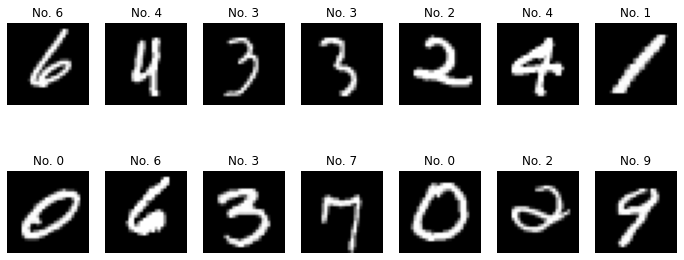

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

rand_14 = np.random.randint(0, x_train.shape[0],14)
sample_digits = x_train[rand_14]
sample_labels = y_train[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()


### Reshaping

In [ ]:
x_train = np.reshape(x_train, newshape=(60000, 784)).astype( "float32")
x_test = np.reshape(x_test, newshape=(10000, 784) ).astype('float32')

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
x_train = x_train/ 255
x_test = x_test/255

## Autoencoder 1

In [ ]:
input_main = Input(shape=(784,))
h1 = Dense(units=100, activation="sigmoid" )(input_main)
o1 = Dense(units=784, activation="sigmoid")(h1)

autoencoder1 = Model(inputs=input_main, outputs=o1)
autoencoder1.summary()
autoencoder1.compile(loss = 'mse', optimizer ='adam', metrics=['accuracy' ])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(type(autoencoder1.layers[0].get_weights()))   # input layer
print(type(autoencoder1.layers[1].get_weights()))   # hidden layer
print(type(autoencoder1.layers[2].get_weights()))   # output layer

print(len(autoencoder1.layers[0].get_weights()))
print(len(autoencoder1.layers[1].get_weights()))   # 2 (weights and bias)
print(len(autoencoder1.layers[2].get_weights()))   # 2 (weights and bias)

<class 'list'>
<class 'list'>
<class 'list'>
0
2
2


In [ ]:
print(autoencoder1.layers[1].get_weights()[0].shape) # weights
print(autoencoder1.layers[2].get_weights()[0].shape)

print(autoencoder1.layers[1].get_weights()[1].shape) # bias
print(autoencoder1.layers[2].get_weights()[1].shape)

(784, 100)
(100, 784)
(100,)
(784,)


In [ ]:
def show_plots(history):
    loss_vals = history['loss']
    # val_loss_vals = history['val_loss']
    epochs = range(1, len(history['accuracy'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle='-', label='Training Loss')
    # ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['accuracy']
    # val_acc_vals = history['val_accuracy']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls='-', label='Training Accuracy')
    # ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()

## Training Autoencoder 1

In [ ]:
history1 = autoencoder1.fit(x_train, x_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - accuracy: 0.0116
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0212 - accuracy: 0.0105
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0130 - accuracy: 0.0115
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0098 - accuracy: 0.0117
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0079 - accuracy: 0.0126
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 0.0134
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0052 - accuracy: 0.0135
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0044 - accuracy: 0.0144
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0039 - accuracy: 0.0137
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.003

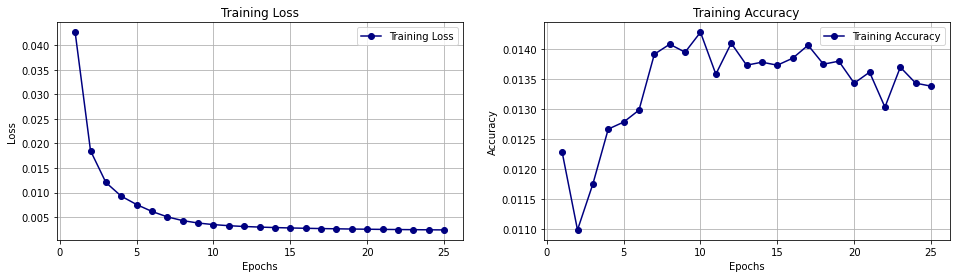

In [ ]:
show_plots(history1.history)

In [ ]:
h1_output = autoencoder1.layers[1].output
trimmed_autoencoder1 = Model(inputs = input_main, outputs=h1_output)
x_train_ae2 = trimmed_autoencoder1.predict(x_train)
x_test_ae2 = trimmed_autoencoder1.predict(x_test)
print(x_train_ae2.shape)

inputs_ae2 = Input(shape = (100, ))
h2 = Dense(units=50, activation='sigmoid')(inputs_ae2)
o2 = Dense(units=100, activation='sigmoid')(h2)
autoencoder2 = Model(inputs=inputs_ae2, outputs = o2)

autoencoder2.compile(loss = 'mse', optimizer = 'adam', metrics=['accuracy'])
print(autoencoder2.layers[1].get_weights()[0].shape)
print(autoencoder2.layers[2].get_weights()[0].shape)



(60000, 100)
(100, 50)
(50, 100)


## Training Autoencoder 2

In [ ]:
history2 = autoencoder2.fit(x_train_ae2, x_train_ae2, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0455 - accuracy: 0.0332
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0228 - accuracy: 0.0790
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0171 - accuracy: 0.1224
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0160 - accuracy: 0.1439
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0156 - accuracy: 0.1521
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0153 - accuracy: 0.1563
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0151 - accuracy: 0.1586
Epoch 8/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0149 - accuracy: 0.1592
Epoch 9/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0148 - accuracy: 0.1610
Epoch 10/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.014

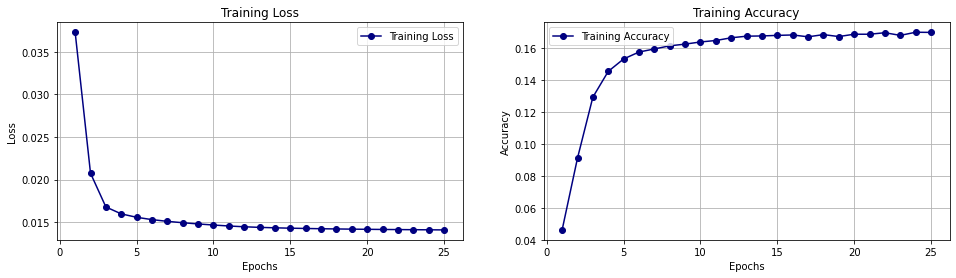

In [ ]:
show_plots(history2.history)

In [ ]:
h2_output = autoencoder2.layers[1].output
trimmed_autoencoder2 = Model(inputs = inputs_ae2, outputs = h2_output)
x_train_clf = trimmed_autoencoder2.predict(x_train_ae2)
x_test_clf = trimmed_autoencoder2.predict(x_test_ae2)
print (x_train_clf. shape)


(60000, 50)


## Classifier

In [ ]:
inputs_clf = Input(shape=(50, ))
f_output = Dense(units=10, activation='softmax')(inputs_clf)
clf = Model(inputs=inputs_clf, outputs=f_output)
clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
print(clf.layers[1].get_weights()[0].shape)

(50, 10)


### Training classifier

In [ ]:
history_clf = clf.fit(x_train_clf, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0899 - accuracy: 0.3490
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3096 - accuracy: 0.7809
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9485 - accuracy: 0.8282
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7682 - accuracy: 0.8423
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6626 - accuracy: 0.8517
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6059 - accuracy: 0.8540
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5581 - accuracy: 0.8610
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5311 - accuracy: 0.8640
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5058 - accuracy: 0.8666
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.481

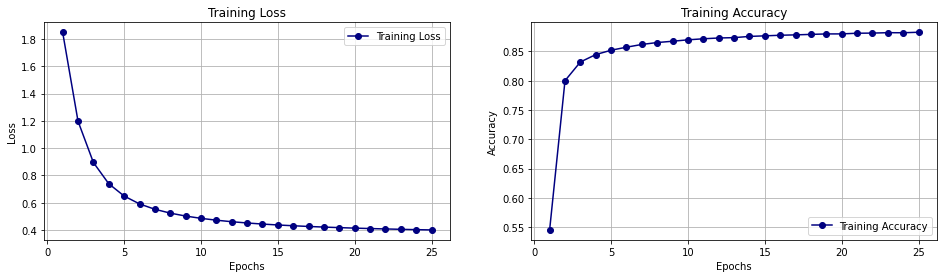

In [ ]:
show_plots(history_clf.history)

In [ ]:
print(clf.evaluate(x_test_clf, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8891
[0.3809216320514679, 0.8891000151634216]


# Fine tuning

In [ ]:
new_model = Sequential()
new_model.add(autoencoder1.layers[0])
new_model.add(autoencoder1.layers[1])
new_model.add(autoencoder2.layers[1])
new_model.add(clf.layers[-1])

new_model.summary()
new_model. compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="adam")

print(new_model.layers[1].get_weights()[0].shape)
print(autoencoder2.layers[1].get_weights()[0].shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
(100, 50)
(100, 50)


Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3214 - accuracy: 0.9046
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1764 - accuracy: 0.9480
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1235 - accuracy: 0.9646
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0910 - accuracy: 0.9733
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0767 - accuracy: 0.9774
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9819
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0486 - accuracy: 0.9855
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9896
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0324 - accuracy: 0.9899
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

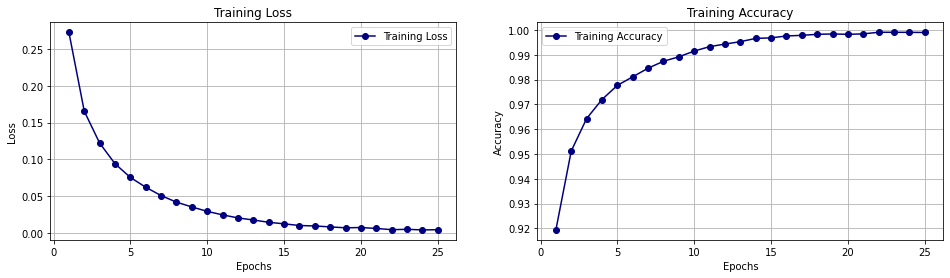

In [ ]:
history3 = new_model.fit(x_train, y_train, epochs=25)
show_plots(history3.history)

In [ ]:
print(new_model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9753
[0.10497111827135086, 0.9753000140190125]
